In [1]:
import pandas as pd
import numpy as np
import pickle as pickle
import sklearn.feature_extraction.text as skl_text
from sklearn.decomposition import PCA
import sklearn.svm as svm
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Loading data
train_set = pd.read_csv("../data/twitter_training.csv",names=["Tweet Id","Entity","Sentiment","Tweet Content"])
train_set

,Tweet Id,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
# Cleaning data
## Remove rows with missing values
hasnan=train_set.isna().any(axis=1)
for i in hasnan.index:
    if hasnan[i]:
        print("dropped",i)
        train_set=train_set.drop(i)

dropped 61
dropped 553
dropped 589
dropped 745
dropped 1105
dropped 1106
dropped 2295
dropped 2296
dropped 2297
dropped 2359
dropped 2413
dropped 2473
dropped 2474
dropped 2929
dropped 2983
dropped 2997
dropped 2998
dropped 2999
dropped 3061
dropped 3097
dropped 3243
dropped 3244
dropped 3245
dropped 3337
dropped 3457
dropped 3697
dropped 3835
dropped 3836
dropped 3939
dropped 3940
dropped 3941
dropped 3967
dropped 4233
dropped 4234
dropped 4235
dropped 4237
dropped 4413
dropped 4414
dropped 4415
dropped 4755
dropped 4756
dropped 4757
dropped 4869
dropped 4870
dropped 4871
dropped 4899
dropped 4900
dropped 4901
dropped 5421
dropped 5422
dropped 5423
dropped 5521
dropped 5559
dropped 5560
dropped 5561
dropped 5731
dropped 5973
dropped 5974
dropped 5975
dropped 6015
dropped 6016
dropped 6017
dropped 6067
dropped 6068
dropped 6081
dropped 6082
dropped 6083
dropped 6585
dropped 6586
dropped 6587
dropped 6699
dropped 6700
dropped 6701
dropped 6861
dropped 6862
dropped 6863
dropped 6903
drop

In [4]:
# Fitting tf-idf vectorizer
tfidf_vec = skl_text.TfidfVectorizer(max_features=200)
tfidf_matrix = tfidf_vec.fit_transform(train_set["Tweet Content"])
tfidf_matrix.shape

(73996, 200)

In [5]:
# Dimensionality reduction
arr = [np.sum(tfidf_matrix[:,i]) for i in tqdm(range(tfidf_matrix.shape[1]))]

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 301.20it/s]


In [6]:
#arr2 = np.array([arr,train_set["Tweet Id"].to_numpy()]).T

In [7]:
#arr2.shape

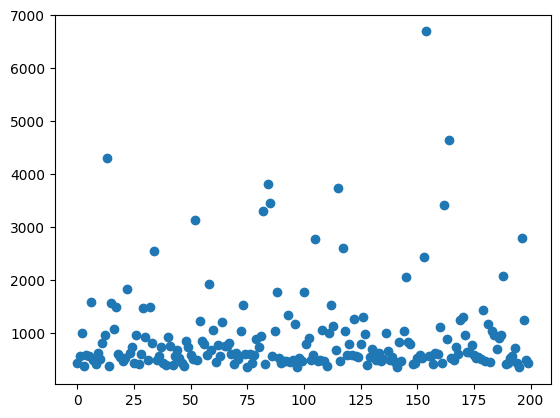

In [8]:
plt.scatter(range(tfidf_matrix.shape[1]),arr)

In [9]:
names = tfidf_vec.get_feature_names_out()
candidates = [[],[]]
cutoff = 500
for i in tqdm(range(len(arr))):
    if arr[i] > cutoff:
        candidates[0].append(names[i])
        candidates[1].append(arr[i])

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 849049.39it/s]


<BarContainer object of 146 artists>

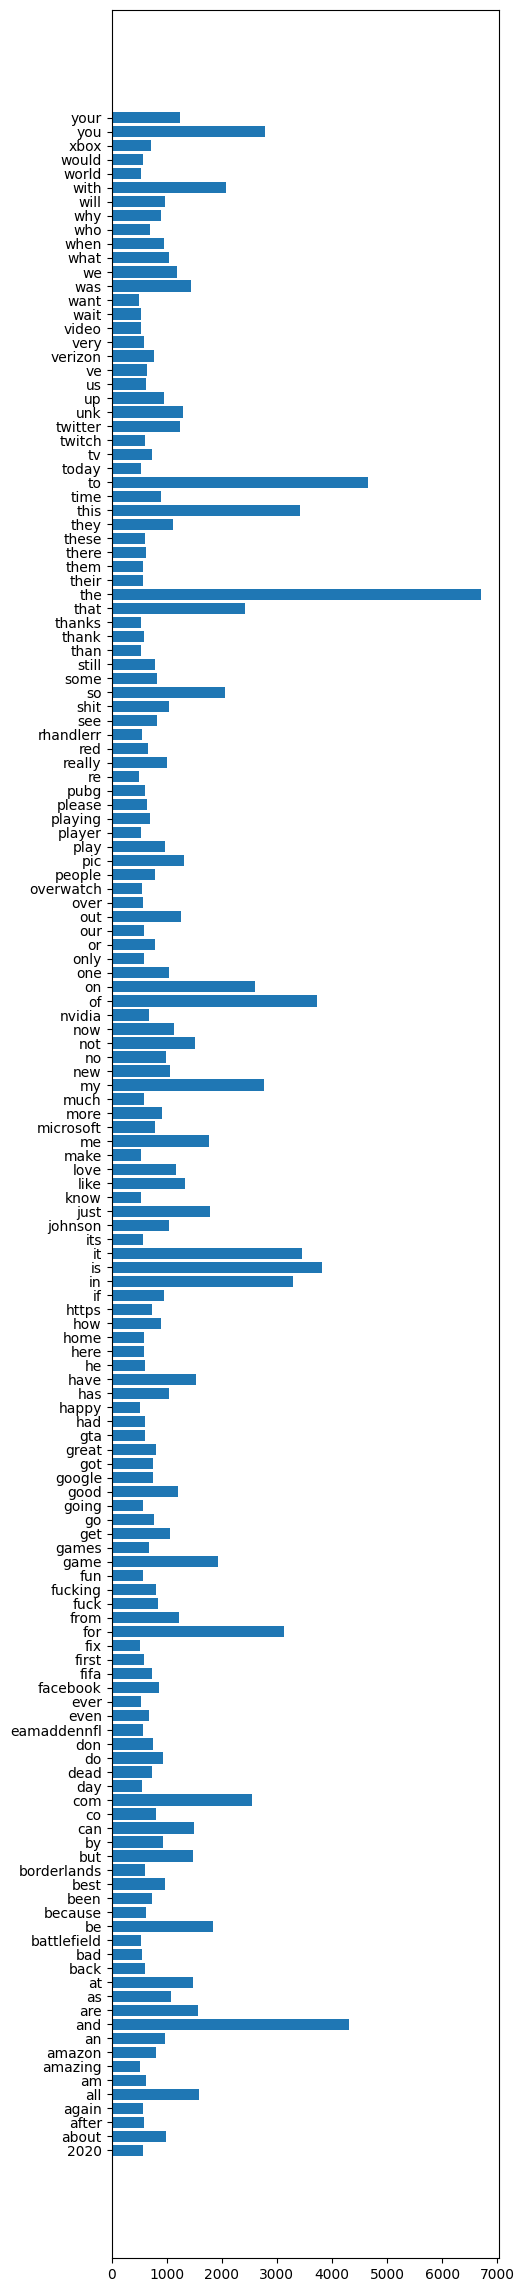

In [10]:
figure = plt.figure(figsize=[5, 0.2*len(candidates[1])])
plt.barh(candidates[0], candidates[1])
#figure.show()

In [11]:
names

array(['10', '2020', 'about', 'actually', 'after', 'again', 'all', 'also',
       'always', 'am', 'amazing', 'amazon', 'an', 'and', 'any', 'are',
       'as', 'at', 'back', 'bad', 'ban', 'battlefield', 'be', 'because',
       'been', 'being', 'best', 'black', 'borderlands', 'but', 'by',
       'call', 'can', 'co', 'com', 'damn', 'day', 'dead', 'depot', 'did',
       'do', 'don', 'duty', 'eamaddennfl', 'even', 'ever', 'every',
       'everyone', 'facebook', 'fifa', 'first', 'fix', 'for', 'fortnite',
       'from', 'fuck', 'fucking', 'fun', 'game', 'games', 'get',
       'getting', 'go', 'going', 'good', 'google', 'got', 'great', 'gta',
       'guys', 'had', 'happy', 'has', 'have', 'he', 'help', 'here', 'his',
       'home', 'how', 'https', 'if', 'in', 'into', 'is', 'it', 'its',
       'johnson', 'just', 'know', 'last', 'league', 'legends', 'like',
       'live', 'looks', 'love', 'made', 'make', 'man', 'me', 'microsoft',
       'more', 'most', 'much', 'my', 'nba2k', 'never', 'new', 'news

In [12]:
SVC = svm.LinearSVC()

In [13]:
d = {}
for s in train_set["Entity"]:
    if s not in d:
        d[s] = 0
    d[s] += 1

In [14]:
d

{'Borderlands': 2280,
 'CallOfDutyBlackopsColdWar': 2343,
 'Amazon': 2276,
 'Overwatch': 2316,
 'Xbox(Xseries)': 2283,
 'NBA2K': 2343,
 'Dota2': 2359,
 'PlayStation5(PS5)': 2291,
 'WorldOfCraft': 2357,
 'CS-GO': 2284,
 'Google': 2274,
 'AssassinsCreed': 2234,
 'ApexLegends': 2353,
 'LeagueOfLegends': 2377,
 'Fortnite': 2249,
 'Microsoft': 2361,
 'Hearthstone': 2286,
 'Battlefield': 2316,
 'PlayerUnknownsBattlegrounds(PUBG)': 2234,
 'Verizon': 2365,
 'HomeDepot': 2292,
 'FIFA': 2324,
 'RedDeadRedemption(RDR)': 2249,
 'CallOfDuty': 2376,
 'TomClancysRainbowSix': 2364,
 'Facebook': 2362,
 'GrandTheftAuto(GTA)': 2293,
 'MaddenNFL': 2377,
 'johnson&johnson': 2324,
 'Cyberpunk2077': 2262,
 'TomClancysGhostRecon': 2321,
 'Nvidia': 2271}